### Assignment: Lending Club Case Study
Team : Neeraj Dhiman, Anu Thomas <br>
Date : 24 Sep 2024

#### Goals:
    1. Gather and clean/fix the missing data for the analysis.
    2. Understand the driving variables behind the loan defaults and apply the knowledge for portfolio and risk assessment.
    3. Analyse and depict various variables for risk and portfolio assessment.

#### Analysis :
1. Data Analysis.
2. Data Wrangling/Cleaning.
3. Univariate and Bivariate data variables recongnition.
4. EDA using graphs (univariate/bivariate/mvariate)
5. conclusion.

In [626]:
#importing a few of the libraries that would be needed for data cleaning and visual presentations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#importing for datetime functions
from datetime import datetime
import datetime as dt
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use("classic")
sns.set_palette("deep")

#### 1. Importing/loading, cleaning the dataset and dictionary

In [627]:
loan= pd.read_csv('loan.csv')
loan_dict=pd.read_excel('Data_Dictionary.xlsx')

##### - Metadata analysis of the loaded data

In [628]:
print('Number of rows# ', loan.shape[0])
print('Number of cols#' ,loan.shape[1])
print("--------------------------")
loan.info()

Number of rows#  39717
Number of cols# 111
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


##### - Data Frame dimentions change to accomodate large amount of data

In [629]:
pd.set_option('Display.max_rows', 500)
pd.set_option('Display.max_columns', 500)
pd.set_option('Display.width', 1000)


##### - check and remove the columns having more than the 50% of missing values

In [630]:
cols_na_gt50=loan.columns[round(100*(loan.isna().sum()/loan.shape[0]),2)>=50]
cols_na=loan.columns[loan.isna().all()]
print('Total number of columns having all the values as null    -->',len(cols_na))
print('Total number of columns having more than 50% null values -->',len(cols_na_gt50))
print("\n")
print(cols_na_gt50.tolist())

Total number of columns having all the values as null    --> 54
Total number of columns having more than 50% null values --> 57


['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 

##### - Remove the columns with missing data

In [631]:
loan_cln=loan.loc[:,round(100*(loan.isna().sum()/loan.shape[0]),2).sort_values(ascending=False)<50]

In [632]:
loan_cln.shape

(39717, 54)

##### - check the cleaned loan dataset

In [633]:
print(round(100*(loan_cln.isna().sum()/loan_cln.shape[0]),2).sort_values(ascending=False))
print(loan_cln.shape)

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
term                           0.00
int_rate                       0.00
installment                    0.00
annual_inc                     0.00
funded_amnt_inv                0.00
funded_amnt                    0.00
loan_amnt                      0.00
sub_grade                      0.00
grade                          0.00
id                             0.00
member_id                      0.00
purpose                        0.00
url                            0.00
loan_status                    0.00
pymnt_plan                     0.00
issue_d                        0.00
verification_status         

##### - check the dictionary

In [634]:
#just for seeing the relevance of the columns as per the data dictionary
loan_dict.head(2)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.


##### - check for the non unique values columns where there are only one unique value and remove 

In [635]:
print(loan_cln.nunique().sort_values())

pymnt_plan                        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
tax_liens                         1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
application_type                  1
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

##### - removing columns with unique value as 1, since it would not be of any significance for our analysis

In [636]:
loan_cln=loan_cln.loc[:,loan_cln.nunique()>1]

##### - checking the cleaned loan dataset after clean

In [637]:
print(loan_cln.info())
print(loan_cln.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [638]:
loan_cln.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0


##### - More columns to clean/remove from the loan_cln above:
    1. Fields id, member_id is similar to emp_id so it is irrelevant for analysis
    2. Title, emp_title ,desc, url, zip_code (masked) are also irrelevant and won't be needed for the analysis
    3. Data taken/captured post loan approval is also irrelevant for portfolio and risk assessment.

In [639]:
cols_notneeded=['member_id','title','desc','url','zip_code','earliest_cr_line','last_pymnt_amnt','last_pymnt_d','total_pymnt'
                    ,'total_pymnt_inv','total_rec_int','emp_title','last_credit_pull_d','id','recoveries', 'collection_recovery_fee',
               'total_rec_late_fee','out_prncp', 'out_prncp_inv', 'total_rec_prncp']

In [640]:
loan_cln.drop(cols_notneeded,axis=1,inplace=True)

##### - Remaining Columns

In [641]:
print(loan_cln.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'], dtype='object')


In [642]:
print(loan_cln.shape)

(39717, 25)


##### -Cleaning Rows
* Duplicate
* loan_status 'Current' is also not of relevance
* null rows

In [643]:
#checking for duplicate rows, there are no duplicates
loan_cln[loan_cln.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


##### <i> *there are no duplicate records in the dataset

In [644]:
loan_cln.shape

(39717, 25)

In [645]:
loan_cln.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [646]:
loan_cln.shape

(39717, 25)

##### -Since loans with the Status as 'Current' are not relevant for the analysis so removing from the dataset

In [647]:
loan_cln=loan_cln[~(loan_cln['loan_status']=='Current')]

In [648]:
loan_cln.shape

(38577, 25)

##### -Removing rows having all null values

In [649]:
loan_cln=loan_cln.dropna(axis=0,how='all')

In [650]:
loan_cln.shape

(38577, 25)

###### -<i> There were no rows where have all blank data

#### 2. Fixing/Transforming Data
- Data type coversions as per the data in the columns
- Filling the null or Nan values using median for numeric and mode for categorical values

In [651]:
#check the datatypes of the resultant dataset
print(loan_cln.dtypes)

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object


##### - Lets separate numerical and object columns

In [652]:
obj_cols=loan_cln.select_dtypes(include=["object"]).columns
num_cols=loan_cln.select_dtypes(include=["int64","float64"]).columns
print('Object columns are:')
print(obj_cols)
print('------------------------------------------------------------------------------------------------------------------------------')
print('Numeric columns are:')
print(num_cols)
print('-------------------------------------------------------------------------------------------------------------------------------')


Object columns are:
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'revol_util'], dtype='object')
------------------------------------------------------------------------------------------------------------------------------
Numeric columns are:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'pub_rec_bankruptcies'], dtype='object')
-------------------------------------------------------------------------------------------------------------------------------


##### - obj_cols contains a few columns which are of numeric datatype nature but due to some special char are showing as object
* Identifying and converting such objects

In [653]:
loan_cln[obj_cols].head()

,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,revol_util
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ,83.70%
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,9.40%
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL,98.50%
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,21%
5,36 months,7.90%,A,A4,3 years,RENT,Source Verified,Dec-11,Fully Paid,wedding,AZ,28.30%


##### - From dataframe above, it is evident that the columns term should be an int64 type,int_rate,revol_util should be of float64 . Lets clean and convert.

In [654]:
loan_cln['term']=loan_cln.term.apply(lambda x: (x.strip().split()[0]))

In [655]:
loan_cln['int_rate']=pd.to_numeric(loan_cln['int_rate'].str.rstrip('%'))

In [656]:
loan_cln['revol_util']=pd.to_numeric(loan_cln['revol_util'].str.rstrip('%'))

##### -pull numeric and object columns again

In [657]:
obj_cols=loan_cln.select_dtypes(include=["object"]).columns
num_cols=loan_cln.select_dtypes(include=["int64","float64"]).columns
print('Object columns are:')
print(obj_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Numeric columns are:')
print(num_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')

Object columns are:
Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
Numeric columns are:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------


###### *<i> Evident from the output above that term, int_rate and revol_util are now part of the numeric columns

##### * The obj_cols variable represents categorical variables and num_cols represents that numerical columns, we shall be doing further segregations on the columns level going forward

#### 3. Fix null values for remaining columns

In [658]:
loan_cln.columns[loan_cln.isna().sum()>0]

Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')

In [659]:
loan_cln.isna().sum().sort_values(ascending=False).head()

emp_length              1033
pub_rec_bankruptcies     697
revol_util                50
loan_amnt                  0
funded_amnt                0
dtype: int64

##### - emp_length, search for the most used value to fill na and then we'll covert it to numeric column

In [660]:
emp_fillna=loan_cln.emp_length.mode()[0]

In [661]:
loan_cln['emp_length']=loan_cln.emp_length.fillna(emp_fillna)

In [662]:
loan_cln['emp_length']=loan_cln.emp_length.apply(lambda x: '0 year' if x=='< 1 year' else x)

In [663]:
#convert emp_length to numeric type int64
loan_cln['emp_length']=pd.to_numeric(loan_cln.emp_length.apply(lambda x: re.sub(r'[<+\s](years)*(year)*','',x)))

In [664]:
loan_cln.emp_length.value_counts()

emp_length
10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

##### - pub_rec_bankruptcies and revol_util are numeric types so will fill the misssing data using median value

In [665]:
loan_cln['pub_rec_bankruptcies']=loan_cln['pub_rec_bankruptcies'].fillna(loan_cln['pub_rec_bankruptcies'].median())

In [666]:
loan_cln.revol_util.fillna(loan_cln.revol_util.median(),inplace=True)

##### - change issue_d to datetime from string to be able to derive columns from it

In [667]:
loan_cln.issue_d=loan_cln.issue_d.apply(lambda x:datetime.strptime(x,'%b-%y'))

In [668]:
loan_cln.shape

(38577, 25)

##### - Derive columns from issue_d

In [669]:
loan_cln['loan_issue_month']=pd.DatetimeIndex(loan_cln.issue_d).month

In [670]:
loan_cln['loan_issue_year']=pd.DatetimeIndex(loan_cln.issue_d).year

In [671]:
obj_cols=loan_cln.select_dtypes(include=["object"]).columns
num_cols=loan_cln.select_dtypes(include=["int64","float64"]).columns
print('Object columns are:')
print(obj_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Numeric columns are:')
print(num_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')

Object columns are:
Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
Numeric columns are:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------


##### - Look at the frequency of values in each columns

In [672]:
for i in obj_cols:
    x = loan_cln[i].value_counts()
    print("Category Column name is:",i)
    print("Values:\n",x)
    print("\n")

Category Column name is: term
Values:
 term
36    29096
60     9481
Name: count, dtype: int64


Category Column name is: grade
Values:
 grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64


Category Column name is: sub_grade
Values:
 sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64


Category Column name is: home_ownership
Values:
 home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64


Category Column name is: verification_status
Values:
 verification_status
Not Verified       16694
Verif

In [673]:
for i in num_cols:
    x = loan_cln[i].value_counts().sort_values(ascending=False)
    print("Category Column name is:",i)
    print("Values:\n",x)
    print("\n")

Category Column name is: loan_amnt
Values:
 loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
19975       1
19900       1
13950       1
17350       1
19875       1
Name: count, Length: 870, dtype: int64


Category Column name is: funded_amnt
Values:
 funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
13825       1
23550       1
18675       1
13875       1
22350       1
Name: count, Length: 1019, dtype: int64


Category Column name is: funded_amnt_inv
Values:
 funded_amnt_inv
5000.000000     1294
10000.000000    1264
6000.000000     1182
12000.000000    1016
8000.000000      887
                ... 
1099.995904        1
1574.995234        1
13644.504000       1
75.000000          1
6501.642393        1
Name: count, Length: 8050, dtype: int64


Category Column name is: int_rate
Values:
 int_rate
10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
7.49     651
9.99     590
7.90     574
5.

##### - Now that we have cleaned the data we'd need to see and remove outliers if any
    - Identify the columns to check for the analysis
    - ratio of funded and invested amounts , totalamount and funded amount ratio

In [674]:
ol_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','annual_inc','dti']


##### - Check for outliers

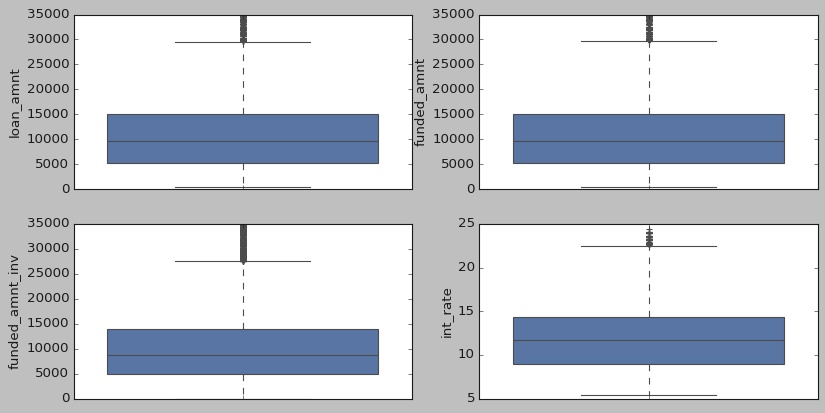

In [675]:
fig, axes= plt.subplots(2,2,sharex=True,figsize=(12,6))
sns.boxplot(ax=axes[0,0],data=loan_cln,y='loan_amnt')
sns.boxplot(ax=axes[0,1],data=loan_cln,y='funded_amnt')
sns.boxplot(ax=axes[1,0],data=loan_cln,y='funded_amnt_inv')
sns.boxplot(ax=axes[1,1],data=loan_cln,y='int_rate')
plt.show()

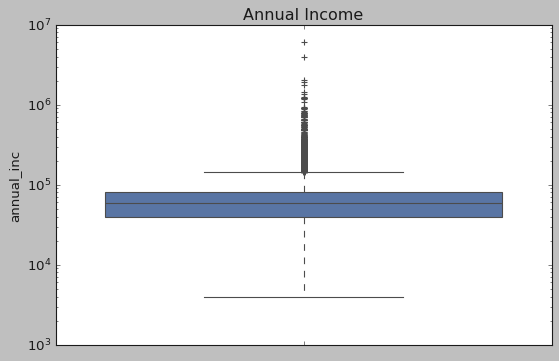

In [676]:
plt.figure(figsize=(8,5))
sns.boxplot(data=loan_cln,y='annual_inc')
plt.title("Annual Income")
plt.yscale('log')
plt.show()

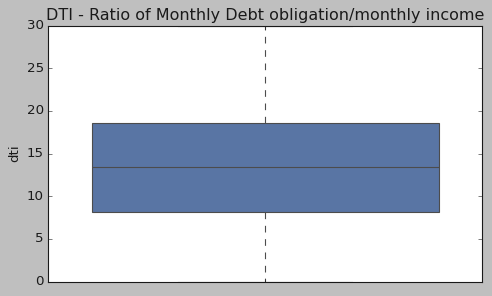

In [677]:
plt.figure(figsize=(7,4))
sns.boxplot(data=loan_cln,y='dti')
plt.title("DTI - Ratio of Monthly Debt obligation/monthly income")
plt.show()

##### *<i> no outliers for dti

##### - removing outliers for 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','annual_inc'

In [678]:
#Remove Outliers function
def outliers_rem(data,cols, thresh=1.5):
    for col in cols:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        low_range=q1-thresh*iqr
        high_range=q3+thresh*iqr
        data=data[(data[col]>=low_range) & (data[col]<=high_range)]
        data[col].sort_values(ascending=True)
    return data

In [679]:
outlier_list=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','annual_inc']

In [680]:
loan_cln=outliers_rem(loan_cln,outlier_list)

In [681]:
loan_cln.shape

(35547, 27)

#### 3. Analysis

##### -Analysis Univariate

##### <i> draw univariate analysis plots

In [682]:
def uni_plt(data,col):
    fig, axes=plt.subplots(1,2,sharex=False,figsize=(14,3))
    sns.distplot(data[col],kde=True,ax=axes[0])
    sns.boxplot(x=data[col],ax=axes[1])
    axes[0].set_xlabel(" ".join(col.split('_')).title())
    axes[1].set_xlabel(" ".join(col.split('_')).title())
    plt.tight_layout()
    plt.show()

##### a). Fact Variable analysis

##### - Loan Amount

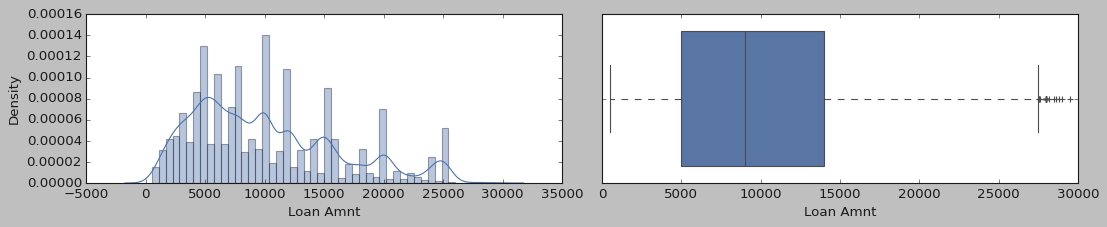

count    35547.000000
mean     10054.663544
std       6116.399890
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29500.000000
Name: loan_amnt, dtype: float64

In [683]:
uni_plt(loan_cln,'loan_amnt')
loan_cln.loan_amnt.describe()

##### -  observation -  most of the loan were applied from 7-14k range 

##### - Interest Rate

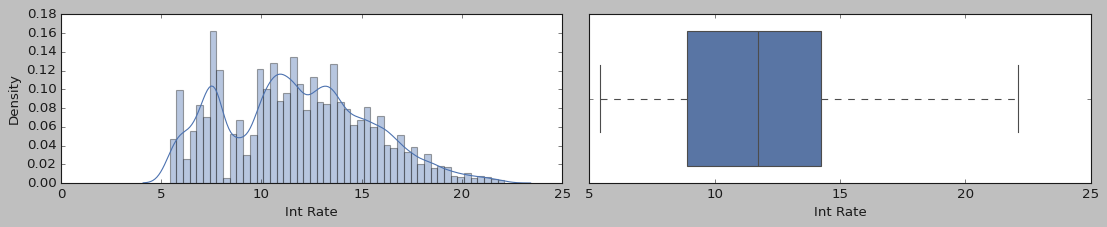

count    35547.000000
mean        11.762901
std          3.574202
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [684]:
uni_plt(loan_cln,'int_rate')
loan_cln.int_rate.describe()

##### -Observation - most of the loans were applied between had 9%-14% rate of interest 

##### - Annual Income

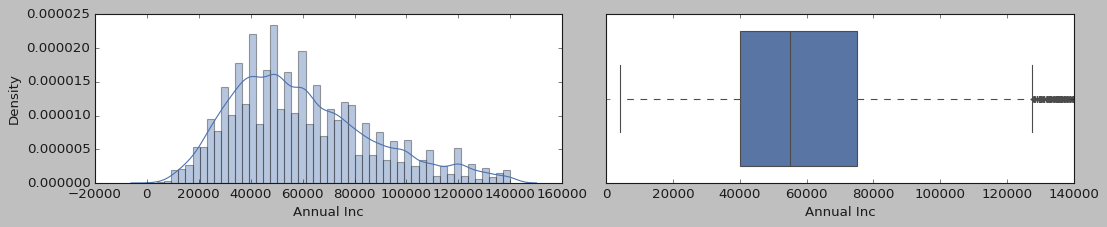

count     35547.000000
mean      59943.406983
std       27338.899633
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [685]:
uni_plt(loan_cln,'annual_inc')
loan_cln.annual_inc.describe()

##### - observation mostly the income was between 40k-75k 

##### - Debt To Income ratio

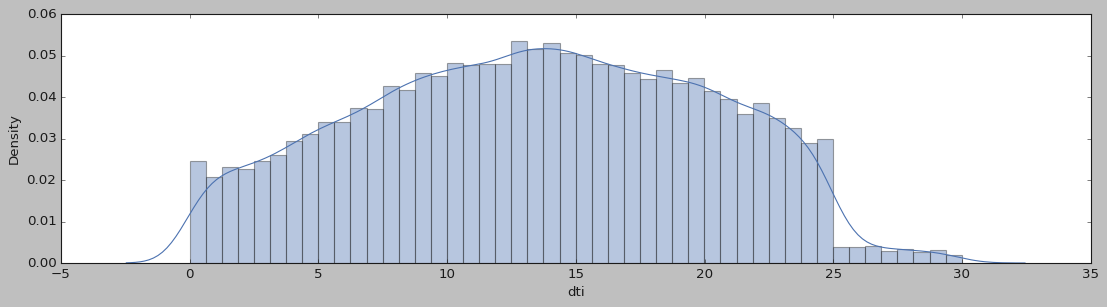

count    35547.000000
mean        13.410260
std          6.663157
min          0.000000
25%          8.300000
50%         13.520000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

In [686]:
fig, axes=plt.subplots(1,1,sharex=False,figsize=(14,4))
sns.distplot(loan_cln['dti'],kde=True)
plt.tight_layout()
plt.show()
loan_cln.dti.describe()

##### -observation the dti was between 8%-19% 

##### b.) Dimentional variable analysis ordered and unordered

term, 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state'

##### Loan Grade Distribution

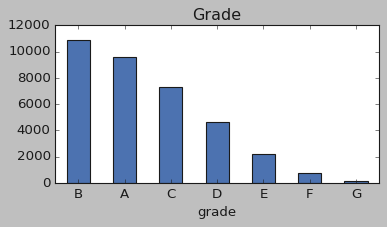

In [687]:
plt.figure(figsize=(5,3))
loan_cln.grade.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title("Grade")
plt.tight_layout()
plt.show()

##### -  Observation - most of the loans applied fall in B and A grades. F and G are the least in terms of loans provided

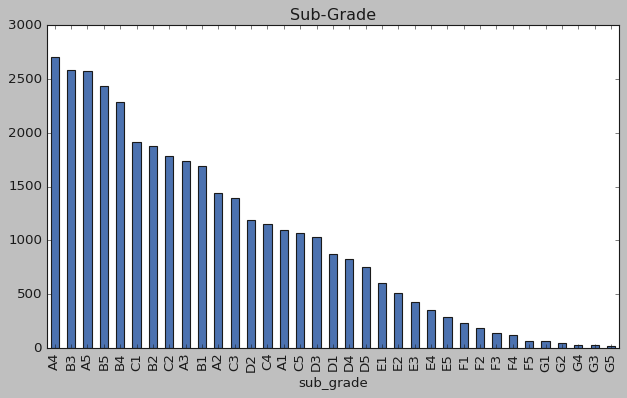

In [688]:
plt.figure(figsize=(8,5))
loan_cln.sub_grade.value_counts().plot.bar()
plt.tight_layout()
plt.title("Sub-Grade")
plt.show()

##### -  Observation - The subgrades follow a similar pattern as Grades. Most loan in the A#/B# while least in the F#/G#

##### Home Ownership distribution for loan applicants

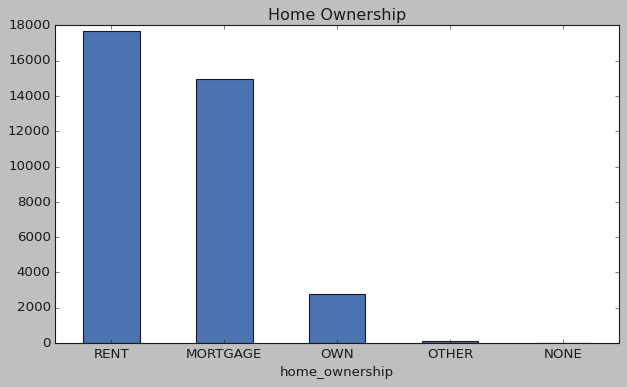

In [689]:
plt.figure(figsize=(8,5))
loan_cln.home_ownership.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Home Ownership')
plt.tight_layout()
plt.show()

##### -Observation - Majority of the loan applicants are either  living on a rented property or paying mortgage

##### Verification Status against loans

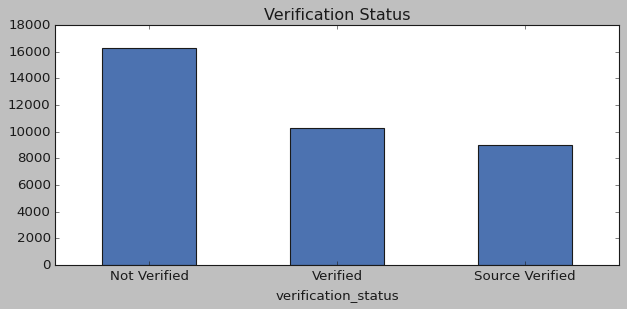

In [690]:
plt.figure(figsize=(8,5))
loan_cln.verification_status.value_counts().plot.bar()
plt.tight_layout()
plt.title('Verification Status')
plt.xticks(rotation=0)
plt.show()

##### - Observation - Majority of loan applicants are not verified

##### Purpose of Loan

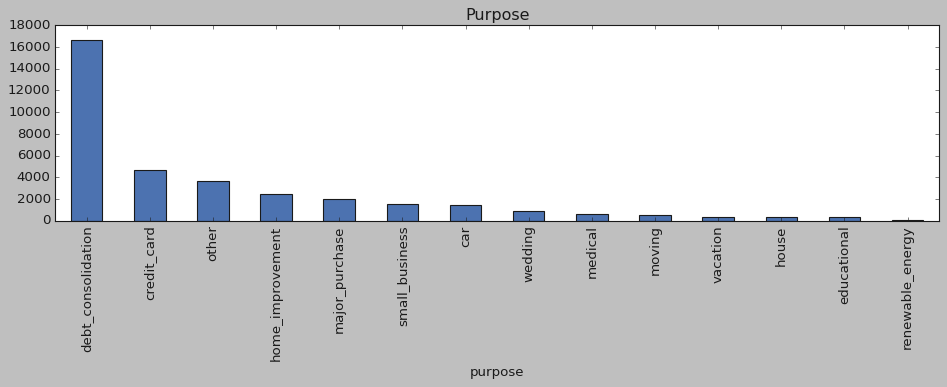

In [691]:
plt.figure(figsize=(12,5))
loan_cln.purpose.value_counts().plot.bar()
plt.xticks(rotation=90)
plt.title('Purpose')
plt.tight_layout()
plt.show()

##### -Observation - Majority of the loans were applied for debt consolidations followed by credit card payments

##### Loan view by state

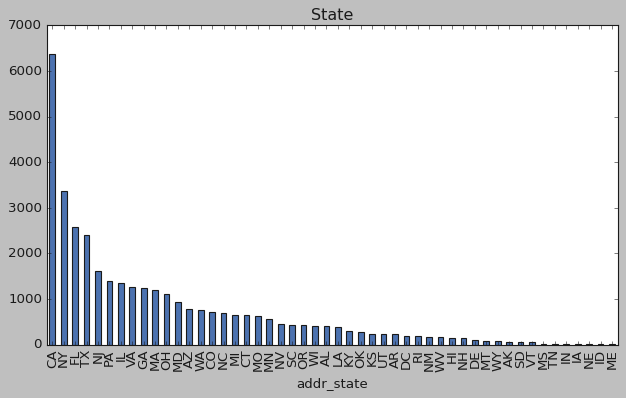

In [692]:
plt.figure(figsize=(8,5))
loan_cln.addr_state.value_counts().plot.bar()
plt.tight_layout()
plt.title('State')
plt.show()

##### -Observation - Majority of loan applicants are from CA - california

##### Loan view by term

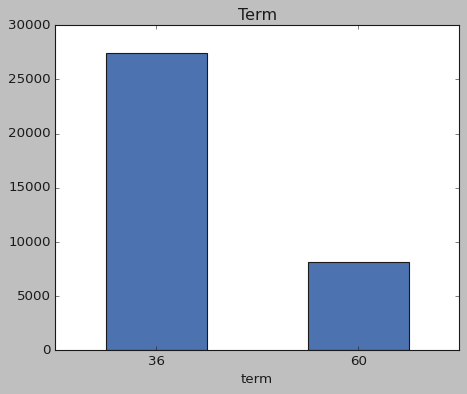

In [693]:
plt.figure(figsize=(6,5))
loan_cln.term.value_counts().plot.bar()
plt.tight_layout()
plt.xticks(rotation=0)
plt.title('Term')
plt.show()

###### -Observation - Most loans are provided for the 3 yrs term

##### Loan view by term

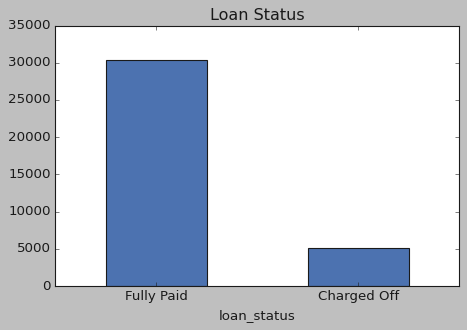

In [694]:
plt.figure(figsize=(6,5))
loan_cln.loan_status.value_counts().plot.bar()
plt.tight_layout()
plt.xticks(rotation=0)
plt.title('Loan Status')
plt.show()

##### Bivariate Ananlysis
- Requires two variables to compare
- usually a fact variable and a dimention
- We would create dimention based upon a few fact variables
- dimentions to be created for 'annual_inc','dti','int_rate','loan_amnt'
- Convert Loan status as a numeric column for 0/1 for easy aggregation

##### Annotate bars

In [695]:
def annotate1(x1,y1,s,d):
    for xy in zip(x1, y1):
        plt.annotate(text = ("{}"+s).format(round(xy[1]*d)), xy = xy,  textcoords='data')

In [696]:
obj_cols=loan_cln.select_dtypes(include=["object"]).columns
num_cols=loan_cln.select_dtypes(include=["int64","float64","int32","<M8[ns]"]).columns
print('Object Columns are:')
print(obj_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')
print('Numeric columns are:')
print(num_cols)
print('-----------------------------------------------------------------------------------------------------------------------------')

Object Columns are:
Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------
Numeric columns are:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'loan_issue_month', 'loan_issue_year'], dtype='object')
-----------------------------------------------------------------------------------------------------------------------------


In [697]:
# Introduce a column for default flag
loan_cln['default_flag']=loan_cln.loan_status.apply(lambda x:0 if x=='Fully Paid' else 1)

##### - Unordered and ordered categorical bivariate analysis


##### purpose vs loan Amount

In [698]:
loan_cln.groupby(by='purpose')['loan_amnt'].sum()

purpose
car                     9545800
credit_card            49885700
debt_consolidation    190351225
educational             2060500
home_improvement       23844200
house                   3528800
major_purchase         15117100
medical                 4838350
moving                  3273525
other                  26573325
renewable_energy         724775
small_business         17583625
vacation                1897050
wedding                 8189150
Name: loan_amnt, dtype: int64

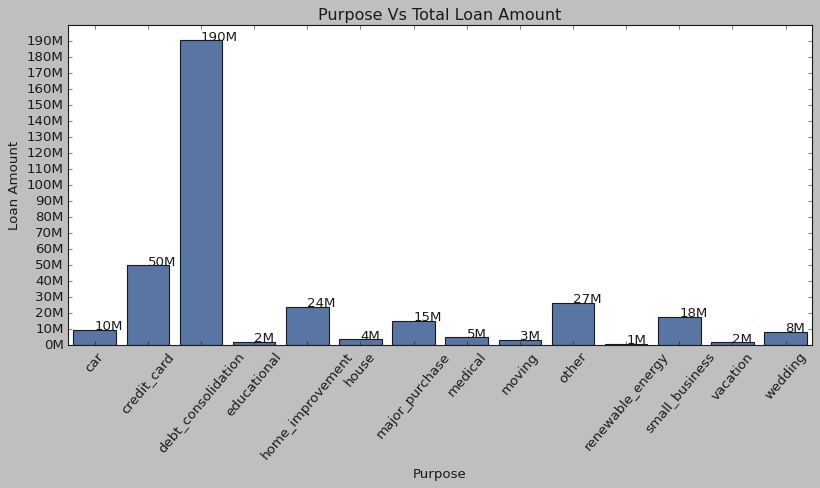

In [699]:
#sum of loan amounts for a purpose
fig,ax=plt.subplots(figsize=(12,5))
pivot_purpose_amt=loan_cln.groupby(['purpose'], as_index=False)['loan_amnt'].sum()
ticks=np.arange(0,200000000,10000000)
labels=['{}M'.format(round(i/1000000)) for i in ticks]
sns.barplot(x=pivot_purpose_amt.purpose,y=pivot_purpose_amt.loan_amnt,ax=ax)
annotate1(pivot_purpose_amt['purpose'],pivot_purpose_amt['loan_amnt'],"M",.000001)
plt.yticks(ticks,labels)
plt.xticks(rotation=50)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Purpose Vs Total Loan Amount')
plt.show()


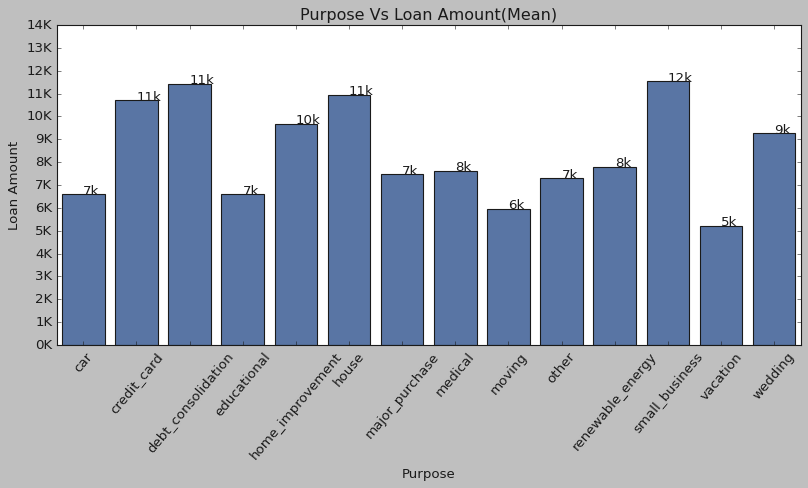

In [700]:
#Average of loan amounts for a purpose
fig,ax=plt.subplots(figsize=(12,5))
pivot_purpose_amt=loan_cln.groupby(['purpose'], as_index=False)['loan_amnt'].mean()
ticks=np.arange(0,15000,1000)
labels=['{}K'.format(round(i/1000)) for i in ticks]
sns.barplot(x=pivot_purpose_amt.purpose,y=pivot_purpose_amt.loan_amnt,ax=ax)
annotate1(pivot_purpose_amt['purpose'],pivot_purpose_amt['loan_amnt'],"k",.001)
plt.yticks(ticks,labels)
plt.xticks(rotation=50)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Purpose Vs Loan Amount(Mean)')
plt.show()

##### -Observation - On an average, loan amount provided in small business and debt consolidation is the same at around 11.5K

##### purpose vs default ratio

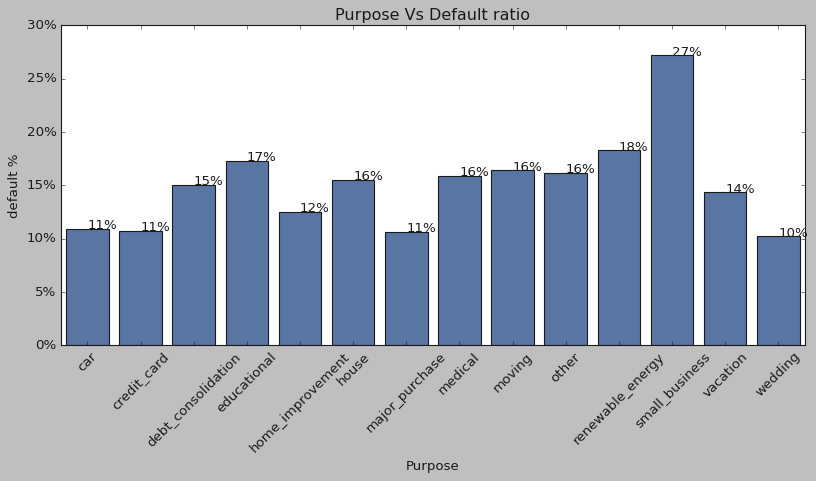

In [701]:
fig,ax=plt.subplots(figsize=(12,5))
ticks=np.arange(0,.35,.05)
labels=['{}%'.format(round(i*100)) for i in ticks]
anot=loan_cln.groupby(['purpose'], as_index=False)['default_flag'].mean()
annotate1(anot['purpose'],anot['default_flag'],"%",100)
sns.barplot(x=anot.purpose,y=anot.default_flag,ax=ax)
plt.yticks(ticks,labels)
plt.ylabel('default %')
plt.xlabel('Purpose')
plt.xticks(rotation=45)
plt.title('Purpose Vs Default ratio')
plt.show()

##### -Observation - small businesses are more likely to default. And Small Business has been allocated the most amount of loan

##### Verification Vs Default Ratio

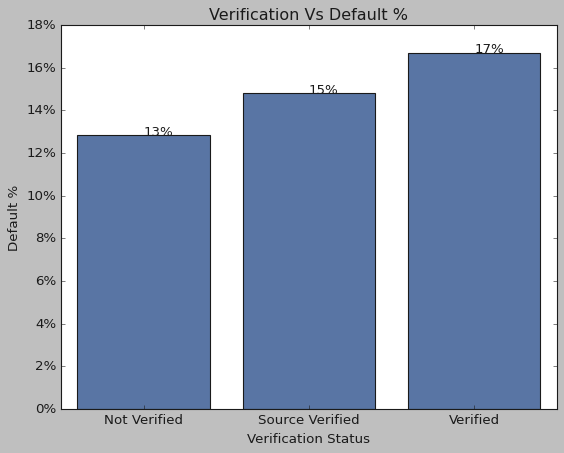

In [702]:
pivot_ver_stat=loan_cln.groupby(['verification_status'],as_index=False)['default_flag'].mean()
#pd.pivot_table(loan_cln,index=['verification_status'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.20,.02)
labels=['{}%'.format(round(i*100)) for i in ticks]
sns.barplot(x=pivot_ver_stat['verification_status'],y=pivot_ver_stat['default_flag'])
annotate1(pivot_ver_stat.verification_status,pivot_ver_stat.default_flag,"%",100)
plt.yticks(ticks,labels)
plt.xticks(rotation=0)
plt.title("Verification Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Verification Status')
plt.show()

##### -Observation:  Verified persons are more prone to default. May be the verification process needs to be revisited

##### Grade Vs Default Ratio

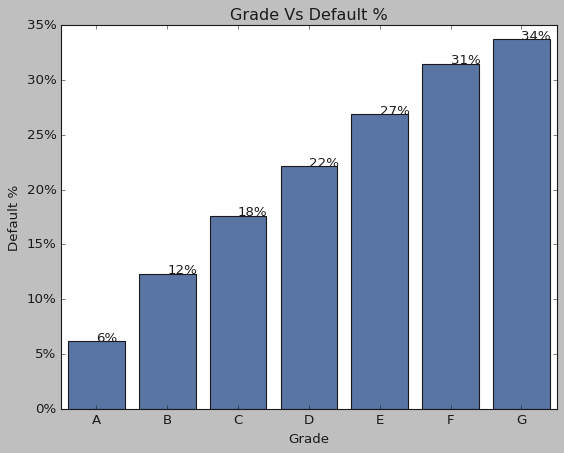

In [703]:
pivot_grade=loan_cln.groupby(['grade'],as_index=False)['default_flag'].mean()
#pd.pivot_table(loan_cln,index=['grade'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.4,.05)
labels=['{}%'.format(round(i*100)) for i in ticks]
sns.barplot(x=pivot_grade.grade,y=pivot_grade.default_flag)
annotate1(pivot_grade.grade,pivot_grade.default_flag,"%",100)
plt.yticks(ticks,labels)
plt.xticks(rotation=0)
plt.title("Grade Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Grade')
plt.show()

##### -Observation - caution advised for loan grades D, F and G

##### State wise Vs Loan amount

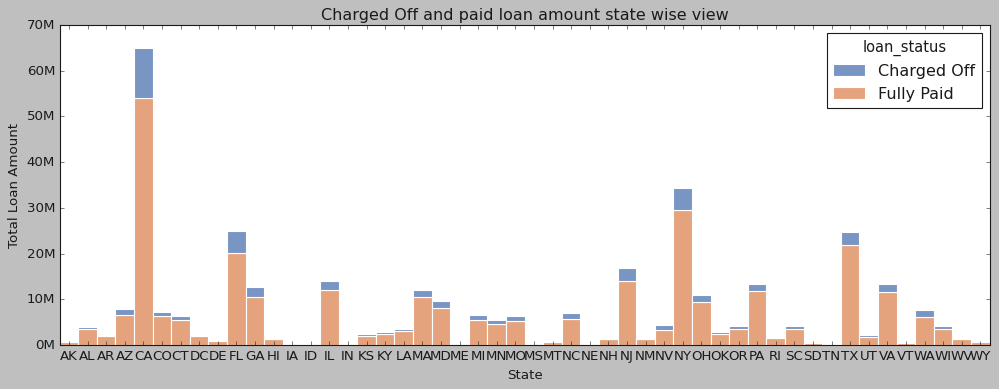

In [704]:
pivot_state=loan_cln.groupby(['addr_state','loan_status'],as_index=False)['loan_amnt'].sum()
plt.figure(figsize=(15,5))
sns.histplot(
    pivot_state,
    x='addr_state',
    weights='loan_amnt',
    hue='loan_status',
    multiple='stack',
    #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
    edgecolor='white'
    # Shrink the bars a bit so they don't touch.
    #shrink=0.8
)

ticks=np.arange(0,80000000,10000000)
labels=['{}M'.format(round(i/1000000)) for i in ticks]
#title='Purpose Vs Overall Loan Amount($)',figsize=(15,6),legend=False)
plt.title("Charged Off and paid loan amount state wise view")
plt.ylabel("Total Loan Amount")
plt.xlabel("State")
plt.yticks(ticks,labels)
plt.show()

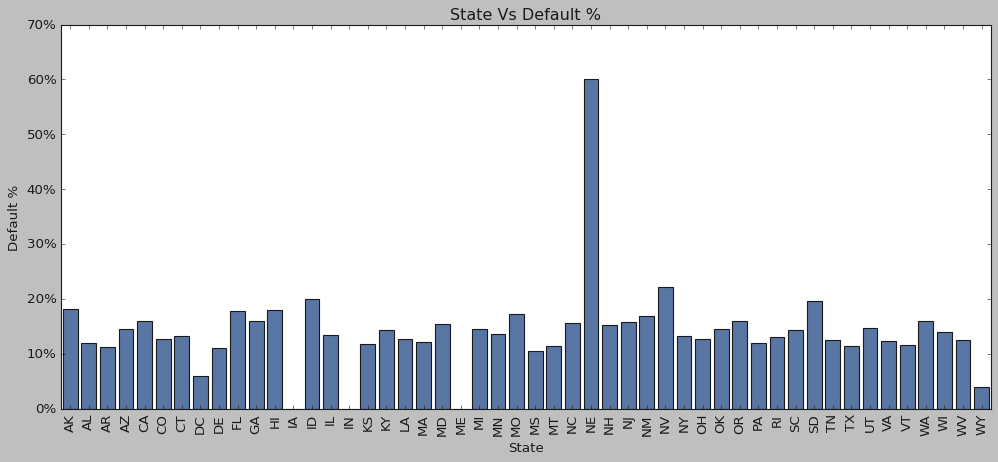

In [705]:
pivot_state=pd.pivot_table(loan_cln,index=['addr_state'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.8,.1)
labels=['{}%'.format(round(i*100)) for i in ticks]
#pivot_state.plot(kind='bar',title='State Vs Defaulter %',figsize=(10,6),legend=False)
plt.figure(figsize=(15,6))
sns.barplot(pivot_state,x=pivot_state.index,y='default_flag')
plt.yticks(ticks,labels)
plt.xticks()
plt.title('State Vs Default %')
plt.ylabel('Default %')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

##### - <i>Nebraska(NE) has most default cases, whereas Indiana(IN), Iowa(IA) and Maine(ME) has zero defualt cases

##### Employment length Vs Defaulter %

In [706]:
loan_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35547 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             35547 non-null  int64         
 1   funded_amnt           35547 non-null  int64         
 2   funded_amnt_inv       35547 non-null  float64       
 3   term                  35547 non-null  object        
 4   int_rate              35547 non-null  float64       
 5   installment           35547 non-null  float64       
 6   grade                 35547 non-null  object        
 7   sub_grade             35547 non-null  object        
 8   emp_length            35547 non-null  int64         
 9   home_ownership        35547 non-null  object        
 10  annual_inc            35547 non-null  float64       
 11  verification_status   35547 non-null  object        
 12  issue_d               35547 non-null  datetime64[ns]
 13  loan_status          

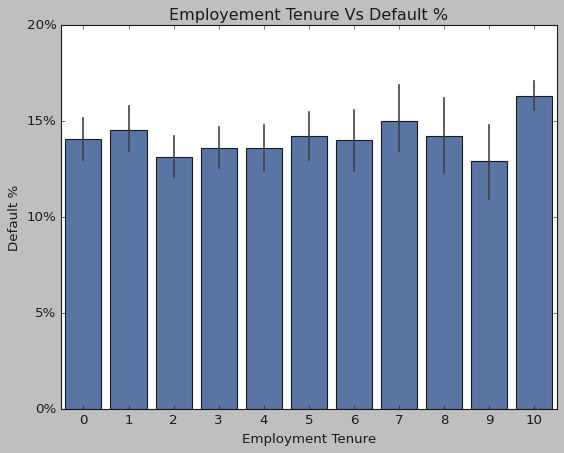

,default_flag
emp_length,
0,0.140438
1,0.145534
2,0.131396
3,0.135793
4,0.135838
5,0.142373
6,0.139940
7,0.149843
8,0.142302


In [707]:
pivot_emp=pd.pivot_table(loan_cln,index=['emp_length'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.25,.05)
labels=['{}%'.format(round(i*100)) for i in ticks]
#pivot_emp.plot(kind='bar',title='Employement Tenure Vs Default %',figsize=(8,6),legend=False)
sns.barplot(loan_cln,x='emp_length', y='default_flag',estimator = np.mean)
plt.yticks(ticks,labels)
plt.xticks()
plt.title('Employement Tenure Vs Default %')
plt.ylabel('Default %')
plt.xlabel('Employment Tenure')
plt.xticks(rotation=0)
plt.show()
pivot_emp

##### -Observation - Employment Length has negligible correlation to default ratio

##### - Derived columns for bivariate analysis

In [708]:
loan_cln.annual_inc.describe()

count     35547.000000
mean      59943.406983
std       27338.899633
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [709]:
##### - so considering income slabs from 25% quartile to 75%
loan_cln.annual_inc.dtype

dtype('float64')

In [710]:
def income_dim(income):
    if(income<=25000.0):
        return '0-25 k' 
    elif((income>25000) & (income<=50000)):
        return '25-50 k'
    elif((income>50000) & (income<=75000)):
        return '50-75 k'
    elif((income>75000) & (income<=100000)):
        return '75-100 k'
    elif((income>100000) & (income<=125000)):
        return '100-125 k'
    else:
        'above 125k' 
    

In [711]:
loan_cln['income_dim']=loan_cln.annual_inc.apply(lambda x:income_dim(x))

##### Income Vs Defaulter %age

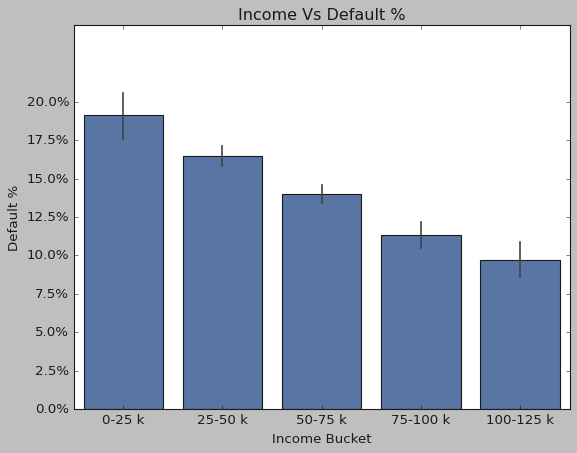

,default_flag
income_dim,
0-25 k,0.191373
100-125 k,0.097143
25-50 k,0.164792
50-75 k,0.139847
75-100 k,0.113451


In [712]:
pivot_income=pd.pivot_table(loan_cln,index=['income_dim'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.225,.025)
labels=['{}%'.format(round(i*100,2)) for i in ticks]
#pivot_income.plot(kind='bar',title='Income Vs Default Ratio',figsize=(8,6))
sns.barplot(loan_cln,x='income_dim', y='default_flag',estimator = np.mean)
plt.yticks(ticks,labels)
plt.xticks()
plt.title("Income Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Income Bucket')
plt.show()
pivot_income

##### -Observation -  lower income group tends to have more defaulters

In [713]:
loan_cln.int_rate.describe()

count    35547.000000
mean        11.762901
std          3.574202
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [714]:
# 25% quartile is around 9% and 75% is around 15%

In [715]:
def int_rate_dim(int_rate):
    if(int_rate<=9):
        return 'very low'
    elif((int_rate>9) & (int_rate<=12)):
        return 'low'
    elif((int_rate>12) & (int_rate<14)):
        return 'normal'
    elif((int_rate>14) & (int_rate<=16)):
        return 'high'
    else:
        return 'very high'

In [716]:
loan_cln['int_rate_dim']=loan_cln.int_rate.apply(lambda x: int_rate_dim(x))

##### Interest Rate Vs Defaulter %age

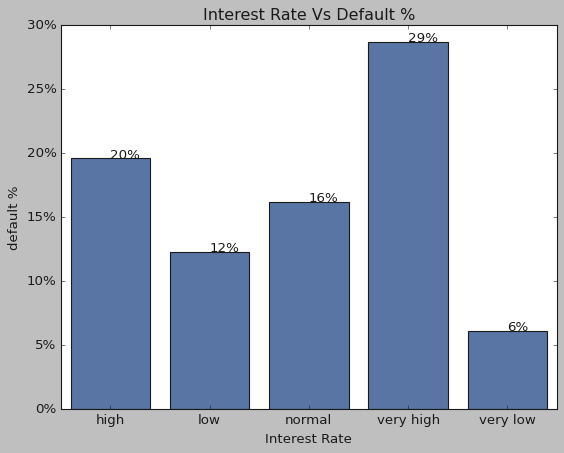

In [717]:
pivot_int_rate=loan_cln.groupby(['int_rate_dim'],as_index=False)['default_flag'].mean()
#pd.pivot_table(loan_cln,index=['int_rate_dim'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.35,.05)
labels=['{}%'.format(round(i*100)) for i in ticks]
#pivot_state.plot(kind='bar',title='State wise Vs Default Ratio',figsize=(8,6))
sns.barplot(pivot_int_rate,x='int_rate_dim', y='default_flag')
annotate1(pivot_int_rate.int_rate_dim,pivot_int_rate.default_flag,"%",100)
plt.yticks(ticks,labels)
plt.xticks()
plt.title("Interest Rate Vs Default %")
plt.ylabel('default %')
plt.xlabel('Interest Rate')
plt.show()

##### -Observation - very high interest rates tend to have more defaulters

#### Interest Rate Vs Loan Amount

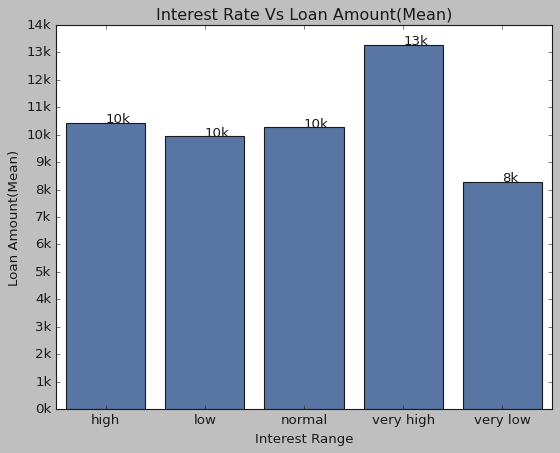

In [718]:
pivot_int_rate=loan_cln.groupby(['int_rate_dim'],as_index=False)['loan_amnt'].mean()
#pd.pivot_table(loan_cln,index=['int_rate_dim'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,15000,1000)
labels=['{}k'.format(round(i/1000)) for i in ticks]
#pivot_state.plot(kind='bar',title='State wise Vs Default Ratio',figsize=(8,6))
sns.barplot(pivot_int_rate,x='int_rate_dim', y='loan_amnt')
annotate1(pivot_int_rate.int_rate_dim,pivot_int_rate.loan_amnt,"k",.001)
plt.yticks(ticks,labels)
plt.xticks()
plt.title("Interest Rate Vs Loan Amount(Mean)")
plt.ylabel('Loan Amount(Mean)')
plt.xlabel('Interest Range')
plt.show()

In [719]:
loan_cln.dti.describe()

count    35547.000000
mean        13.410260
std          6.663157
min          0.000000
25%          8.300000
50%         13.520000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

In [720]:
# debt to income ratio lower the better are from 8% at 25% quantile to 19% at 75% quantile

In [721]:
def dti_dim(dti):
    if(dti<=8): #25% quantile
        return 'very low'
    if((dti>8) & (dti<=14)):
        return 'low'
    if((dti>14) & (dti<=19)):
        return 'moderate'
    if((dti>19) & (dti<=30)):
        return 'high' #75% quantile
    else:
        return 'very high'

In [722]:
loan_cln['dti_dim']=loan_cln.dti.apply(lambda x: dti_dim(x))

##### DTI Vs Defaulter %age

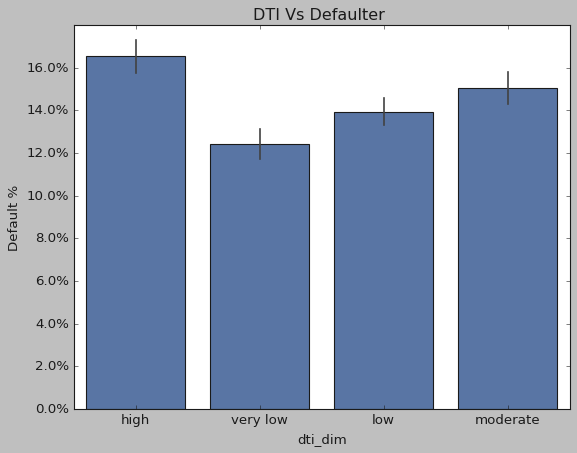

,default_flag
dti_dim,
high,0.165317
low,0.139412
moderate,0.150571
very low,0.124142


In [723]:
pivot_dti=pd.pivot_table(loan_cln,index=['dti_dim'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.18,.02)
labels=['{}%'.format(round(i*100,2)) for i in ticks]
#pivot_dti.plot(kind='bar',title='DTI Vs Default %',figsize=(8,6),legend=False)
sns.barplot(loan_cln,x='dti_dim', y='default_flag',estimator = np.mean)
plt.yticks(ticks,labels)
plt.xticks(rotation=0)
plt.title("DTI Vs Defaulter ")
plt.ylabel('Default %')
plt.show()
pivot_dti

##### -Observation -  dti ratio doesnt seem to affect much but very low dti is less likely to default

In [724]:
loan_cln.loan_amnt.describe()

count    35547.000000
mean     10054.663544
std       6116.399890
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29500.000000
Name: loan_amnt, dtype: float64

In [725]:
def loan_amnt_dim(amount):
    if(amount<=5000):
        return '0-5k' #25%
    elif((amount>5000) & (amount<=10000)):
        return '5-10k'
    elif((amount>10000) & (amount<=15000)):
        return '10-15k'
    elif((amount>15000) & (amount<=20000)):
        return '15-20k'
    elif((amount>20000) & (amount<=25000)):
        return '20-25k'
    elif((amount>25000) & (amount<=30000)):
        return '25-30k'
    else:
        'above 30k'

In [726]:
loan_cln['loan_amnt_dim']=loan_cln.loan_amnt.apply(lambda x: loan_amnt_dim(x))

##### Loan amount Vs Defaulter %age

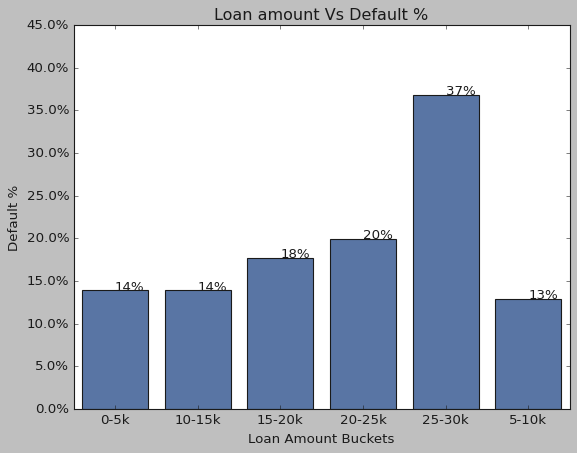

In [727]:
pivot_loan_amnt=loan_cln.groupby(['loan_amnt_dim'],as_index=False)['default_flag'].mean()
#pd.pivot_table(loan_cln,index=['loan_amnt_dim'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,.5,.05)
labels=['{}%'.format(round(i*100,2)) for i in ticks]
#pivot_state.plot(kind='bar',title='State wise Vs Default Ratio',figsize=(8,6))
sns.barplot(pivot_loan_amnt,x='loan_amnt_dim', y='default_flag')
annotate1(pivot_loan_amnt.loan_amnt_dim,pivot_loan_amnt.default_flag,"%",100)
plt.yticks(ticks,labels)
plt.xticks()
plt.title("Loan amount Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Loan Amount Buckets')
plt.show()


##### -Observation - Defaults are more in the high loan amount above 25K

##### Term vs default

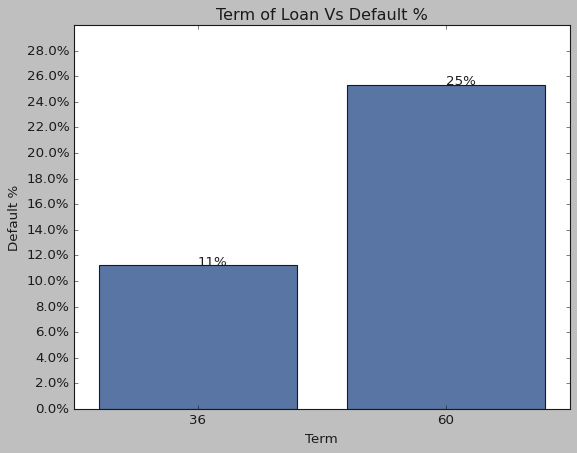

In [728]:
pivot_term=loan_cln.groupby(['term'],as_index=False)['default_flag'].mean()
ticks=np.arange(0,0.3,.02)
labels=['{}%'.format(round(i*100,2)) for i in ticks]
sns.barplot(pivot_term,x='term', y='default_flag')
annotate1(pivot_term.term,pivot_term.default_flag,"%",100)
plt.yticks(ticks,labels)
plt.xticks(rotation=0)
plt.title("Term of Loan Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Term')
plt.show()

##### -Observation - More default in the loans with 5 yrs as term

##### Home ownership vs default

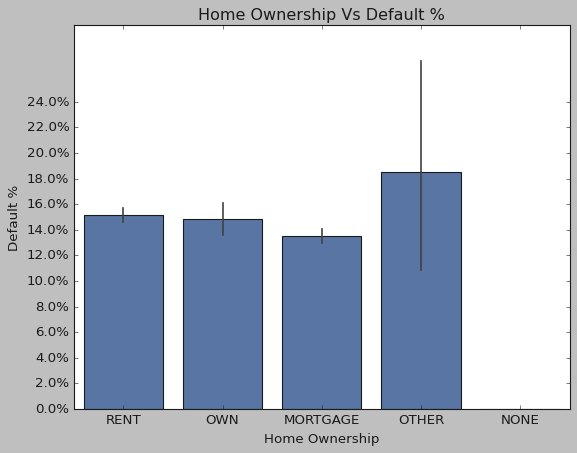

,default_flag
home_ownership,
MORTGAGE,0.135413
NONE,0.000000
OTHER,0.184783
OWN,0.148654
RENT,0.151486


In [729]:
pivot_home=pd.pivot_table(loan_cln,index=['home_ownership'],values=['default_flag'],aggfunc='mean')
ticks=np.arange(0,0.25,.02)
labels=['{}%'.format(round(i*100,2)) for i in ticks]
sns.barplot(loan_cln,x='home_ownership', y='default_flag',estimator = np.mean)
plt.yticks(ticks,labels)
plt.xticks(rotation=0)
plt.title("Home Ownership Vs Default %")
plt.ylabel('Default %')
plt.xlabel('Home Ownership')
plt.show()
pivot_home

###### -Observation - No specific pattern here based on ownership

In [730]:
obj_cols=loan_cln.select_dtypes(include=["object"]).columns
num_cols=loan_cln.select_dtypes(include=["int64","float64","int32","<M8[ns]"]).columns
print('Object Columns are:')
print(obj_cols)
print('----------------------------------------------------------------------------------------------------------------------------')
print('Numeric columns are:')
print(num_cols)
print('----------------------------------------------------------------------------------------------------------------------------')

Object Columns are:
Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'income_dim', 'int_rate_dim', 'dti_dim', 'loan_amnt_dim'], dtype='object')
----------------------------------------------------------------------------------------------------------------------------
Numeric columns are:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_d', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'loan_issue_month', 'loan_issue_year', 'default_flag'], dtype='object')
----------------------------------------------------------------------------------------------------------------------------


#### 4. Multivariate Analysis

In [731]:
# remove unwanted columns
loan_corrs=loan_cln.copy()
unwanted=['open_acc', 'pub_rec', 'revol_util', 'total_acc', 'issue_d', 'funded_amnt', 'funded_amnt_inv']

In [732]:
loan_corrs.drop(obj_cols,axis=1,inplace=True)

In [733]:
loan_corrs.drop(unwanted,axis=1,inplace=True)

In [734]:
corrs=loan_corrs.corr()

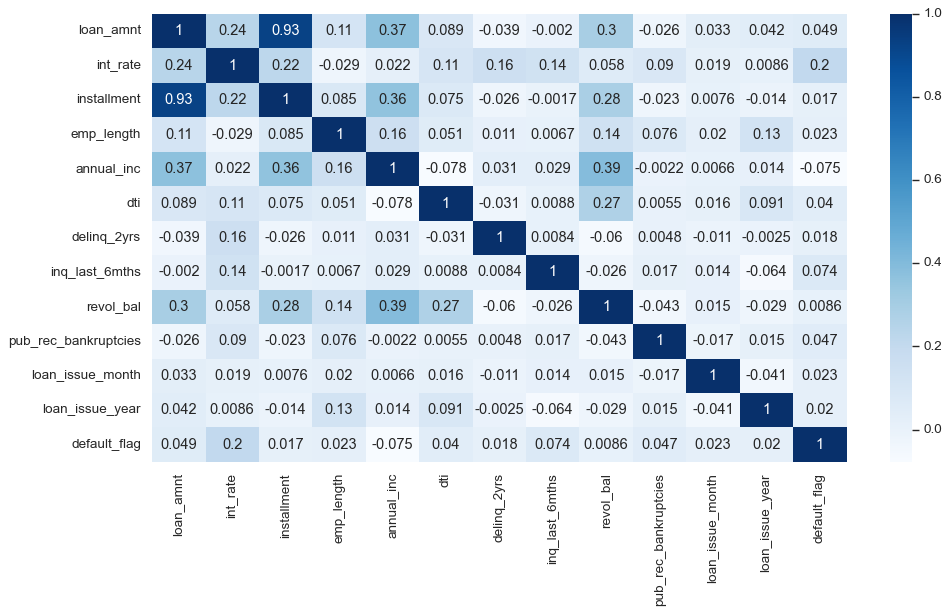

In [735]:
sns.set(font_scale=1.1)
plt.figure(figsize=(14,7))
sns.heatmap(corrs,annot=True,cmap='Blues')
plt.xticks(rotation=90)
plt.show()

##### observations
  ###### - Negative correlation Impact
  - Annual income is negatively correlated to the defaulting rate.
  ###### - Positive correlation Impact
  - Loan amount and Installment has strong correlation. Higher the loan, higher the installment
 